# CLIMADA features

The functionality of climada is gathered in the following classes:

- **Entity**: socio-economic models:

   - Exposures: exposed values
      - BlackMarble: regional economic model from nightlight intensities and economic indicators (GDP, income group)
      - LitPop: regional economic model using nightlight and population maps together with several economic indicators
   - ImpactFuncSet: collection of impact functions per hazard
      - ImpactFunc: one adjustable impact function
      - IFTropCyclone: definition of impact functions for tropical cyclones
   - DiscRates: discount rates per year
   - MeasureSet: collection of measures for adaptation
      - Measure: one configurable measure

- **Hazard**: meteorological models:

   - TropCyclone: tropical cyclone events

- **Impact**: impacts of the Hazard and Entity interaction.

- **CostBenefit**: adaptation options appraisal.
- **Add-ons**: OpenStreetMap and Google Earth Engine routines.

# Risk assessment

## Entity

The entity class is just a container for the exposures, impact functions, discount rates and measures. It can be directly filled from an excel file following climada's template or from MATLAB files of the climada MATLAB version. The excel template can be found in `climada_python/data/system/entity_template.xlsx`.

In [1]:
from climada.entity import Entity
from climada.util.constants import ENT_DEMO_TODAY

# absolute path of file following template. 
ent_file = ENT_DEMO_TODAY
ent_fl = Entity()
ent_fl.read_excel(ent_file)

2020-03-13 16:28:22,664 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


Every class has a `check()` method. This verifies that the necessary data to compute the impact is correctly provided and logs the optional variables that are not present. Use it always after filling an instance.

In [2]:
ent_fl.check() # checks exposures, impact functions, discount rates and measures

2020-03-13 16:28:24,844 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-03-13 16:28:24,845 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2020-03-13 16:28:24,845 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2020-03-13 16:28:24,846 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2020-03-13 16:28:24,847 - climada.entity.exposures.base - INFO - centr_ not set.
2020-03-13 16:28:24,847 - climada.entity.exposures.base - INFO - category_id not set.
2020-03-13 16:28:24,849 - climada.entity.exposures.base - INFO - region_id not set.
2020-03-13 16:28:24,850 - climada.entity.exposures.base - INFO - geometry not set.


### Exposures

The `Entity`'s `exposures` attribute contains geolocalized values of anything exposed to the hazard, let it be monetary value of assets or number of human lifes, for example. It is of type `Exposures`. 

See [Exposures](climada_entity_Exposures.ipynb) tutorial to learn how to fill and use exposures.

See [LitPop](climada_entity_LitPop.ipynb) to model economic exposures using night-time light and population densitites. See [BlackMarble](climada_entity_BlackMarble.ipynb) to model economic exposures based only on night-time light intensities. To combine your exposure with OpenStreetMap's data see [OSM](climada_entity_openstreetmap.ipynb).

2020-03-13 16:28:24,858 - climada.util.coordinates - INFO - Setting geometry points.
2020-03-13 16:28:24,870 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/Users/aznarsig/anaconda3/envs/climada_env/lib/python3.7/site-packages/contextily/tile.py:199: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


2020-03-13 16:28:26,645 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


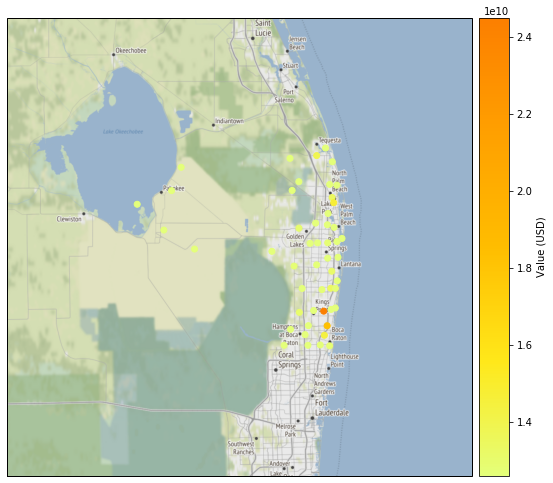

In [3]:
%matplotlib inline
ent_fl.exposures.plot_basemap(buffer=50000.0); # exposures in Florida

### Impact Functions

The `impact_funcs` attribute is of type `ImpactFuncSet`. As such, it contains impact functions for different hazards.

See [Impact Functions](climada_entity_ImpactFuncSet.ipynb) tutorial to learn how to handle this class.

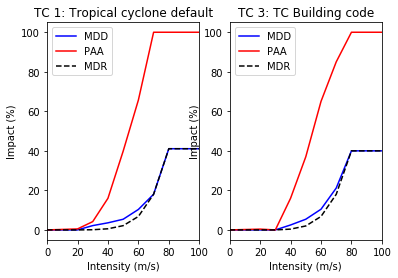

In [4]:
ent_fl.impact_funcs.plot('TC'); # tropical cyclone impact functions

### Adaptation Measures

The `measures` attribute is of type `MeasureSet`. This class is a container of `Measure` instances, similarly to `ImpactFuncSet` containing several `ImpactFunc`. Adaptation measures aim to decrease hazards impacts and are subjected to a cost.

See [Adaptation Measures](climada_entity_MeasureSet.ipynb) to learn to handle measures.

In [5]:
# print measures names
print(ent_fl.measures.get_names())

{'TC': ['Mangroves', 'Beach nourishment', 'Seawall', 'Building code']}


### Discount Rates

The `disc_rates` attribute is of type `DiscRates`. This class contains the discount rates for the following years and computes the net present value for given values.

See [Discount Rates](climada_entity_DiscRates.ipynb).

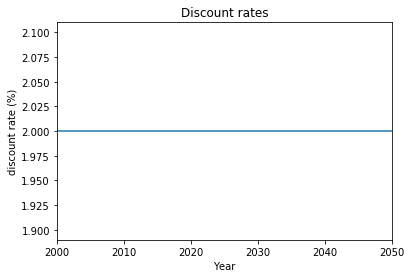

In [6]:
ent_fl.disc_rates.plot()

## Hazard

Hazards are characterized by their frequency of occurrence and the geographical distribution of their intensity. A `Hazard` instance collects events of the same hazard type (e.g. tropical cyclone, flood, drought, ...) over the same centroids. They might be historical events or synthetic.

See [Hazard](climada_hazard_Hazard.ipynb) to learn how to handle hazards.

See [TropCyclone](climada_hazard_TropCyclone.ipynb) to learn to model tropical cyclones. [TCSurge](climada_hazard_TCSurge.ipynb) implements an approximation on tropical cyclones surges.
[StromEurope](climada_hazard_StormEurope.ipynb) creates a hazard event set for extratropical cylones  or winter windstorms in Europe.

To use satellite images in your models follow the tutorial [Google Earth Engine](climada_util_earth_engine.ipynb).

A complete set of tropical cyclones events in Florida can be found in file `HAZ_DEMO_MAT`. This contains 1445 historical events from year 1851 to 2011 and 9 synthetic events for each historical one.

2020-03-13 16:28:27,630 - climada.hazard.base - INFO - Reading /Users/aznarsig/Documents/Python/climada_python/data/demo/atl_prob.mat
2020-03-13 16:28:27,670 - climada.hazard.centroids.centr - INFO - Reading /Users/aznarsig/Documents/Python/climada_python/data/demo/atl_prob.mat


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


Two hurricanes called Andrew happened in  ['1986-06-05', '1992-08-16']


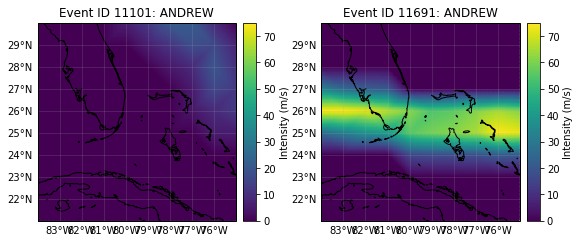

In [7]:
from climada.hazard import Hazard
from climada.util import HAZ_DEMO_MAT
tc_fl = Hazard('TC')
tc_fl.read_mat(HAZ_DEMO_MAT, 'Historic and synthetic tropical cyclones in Florida from 1851 to 2011.')
tc_fl.plot_intensity('ANDREW') # plot intensity of hurricanes Andrew
print('Two hurricanes called Andrew happened in ', tc_fl.get_event_date('ANDREW'))

## Impact

The impact of hazard events over an entity can be computed easily from the previously explained classes. By computing the impact for each event (historical and synthetic), the `Impact` class provides different risk measures, as the expected annual impact per exposure, the probable maximum impact for different return periods and the total average annual impact.

Let us compute the impact of tropical cyclones over the exposures selected in Florida.

The configurable parameter `MAX_SIZE` controls the maximum matrix size contained in a chunk. You can decrease its value if you are having memory issues when using the `Impact`'s `calc` method. A high value will make the computation fast, but increase the memory use. The configuration file is located at `climada_python/climada/conf/defaults.conf`.

2020-03-13 16:28:37,505 - climada.entity.exposures.base - INFO - Matching 50 exposures with 100 centroids.
2020-03-13 16:28:37,509 - climada.engine.impact - INFO - Calculating damage for 50 assets (>0) and 14450 events.
Expected average annual impact: 6.512e+09 USD
2020-03-13 16:28:37,562 - climada.util.coordinates - INFO - Setting geometry points.
2020-03-13 16:28:37,571 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2020-03-13 16:28:37,934 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


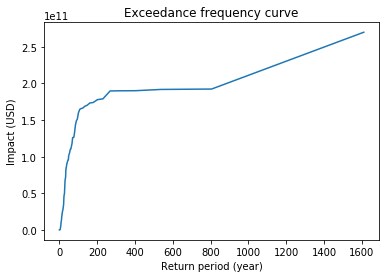

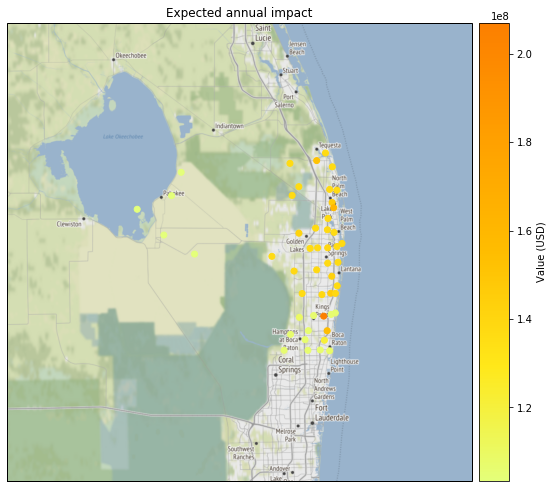

In [8]:
from climada.engine import Impact

imp_fl = Impact()
imp_fl.calc(ent_fl.exposures, ent_fl.impact_funcs, tc_fl)

freq_curve_fl = imp_fl.calc_freq_curve() # impact exceedence frequency curve
freq_curve_fl.plot();

print('Expected average annual impact: {:.3e} USD'.format(imp_fl.aai_agg))

imp_fl.plot_basemap_eai_exposure(buffer=50000.0); # average annual impact at each exposure

We can save our variables in pickle format using the `save` function and load them with `load`. This will save your results in the folder specified in the configuration file. The default folder is a `results` folder which is created in the current path (see default configuration file `climada/conf/defaults.conf`). However, we recommend to use CLIMADA's writers in `hdf5` or `csv` whenever possible.

In [9]:
import os
from climada.util import save, load
save('impact_florida.p', imp_fl)

# Later, the data can be read as follows:
abs_path = os.path.join(os.getcwd(), 'results/impact_florida.p') # absolute path
data = load(abs_path)
print('Data read:', type(data))

2020-03-13 16:28:38,412 - climada.util.save - INFO - Written file /Users/aznarsig/Documents/Python/climada_python/doc/tutorial/results/impact_florida.p
Data read: <class 'climada.engine.impact.Impact'>


`Impact` also has `write_csv()` and `write_excel()` methods to save the impact variables, and `write_sparse_csr()` to save the impact matrix (impact per event and exposure). Use the class doc to get more information about these functions.

See [Impact](climada_engine_Impact.ipynb) to learn more about impact calculations.

# Adaptation options appraisal

The adaptation measures defined before can be valued by estimating its cost-benefit ratio. This is done in the class `CostBenefit`.

Let us suppose that the socioeconomic and climatoligical conditions remain the same in 2040. We then compute the cost and benefit of every adaptation measure as follows:

2020-03-13 16:28:38,423 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-03-13 16:28:38,425 - climada.engine.impact - INFO - Calculating damage for 50 assets (>0) and 14450 events.
2020-03-13 16:28:38,453 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-03-13 16:28:38,455 - climada.engine.impact - INFO - Calculating damage for 50 assets (>0) and 14450 events.
2020-03-13 16:28:38,485 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-03-13 16:28:38,487 - climada.engine.impact - INFO - Calculating damage for 50 assets (>0) and 14450 events.
2020-03-13 16:28:38,521 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-03-13 16:28:38,523 - climada.engine.impact - INFO - Calculating damage for 50 assets (>0) and 14450 events.
2020-03-13 16:28:38,573 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-03-13 16:28:38,574 - cl

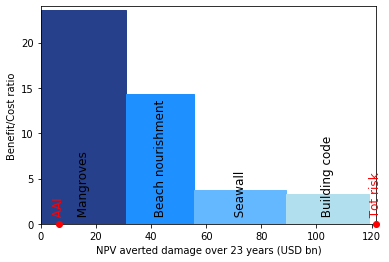

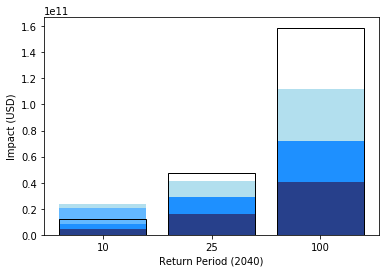

In [10]:
from climada.engine import CostBenefit

cost_ben = CostBenefit()
cost_ben.calc(tc_fl, ent_fl, future_year=2040) # prints costs and benefits
cost_ben.plot_cost_benefit() # plot cost benefit ratio and averted damage of every exposure
cost_ben.plot_event_view() # plot averted damage of each measure for every return period

Let us now assume that the exposure evolves according to `ENT_DEMO_FUTURE` in 2040 and that the intensity of the hazards increase uniformly due to climate change.

2020-03-13 16:28:39,015 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-03-13 16:28:39,015 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2020-03-13 16:28:39,016 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2020-03-13 16:28:39,017 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2020-03-13 16:28:39,017 - climada.entity.exposures.base - INFO - centr_ not set.
2020-03-13 16:28:39,018 - climada.entity.exposures.base - INFO - category_id not set.
2020-03-13 16:28:39,019 - climada.entity.exposures.base - INFO - region_id not set.
2020-03-13 16:28:39,020 - climada.entity.exposures.base - INFO - geometry not set.
2020-03-13 16:28:39,033 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-03-13 16:28:39,034 - climada.engine.impact - INFO - Calculating damage for 50 assets (>0) and 14450 

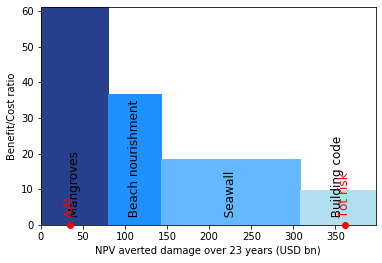

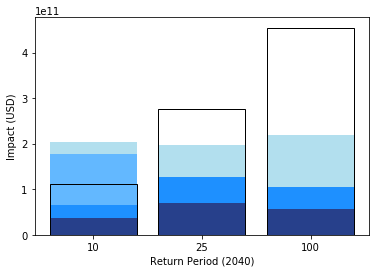

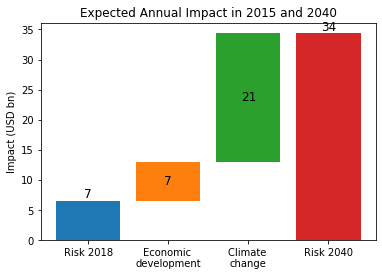

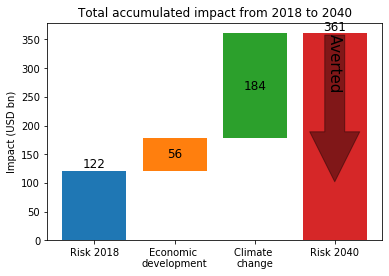

In [11]:
import copy
from climada.util.constants import ENT_DEMO_FUTURE

# future conditions
ent_future = Entity()
ent_future.read_excel(ENT_DEMO_FUTURE)
ent_future.check()
ent_future.exposures.ref_year = 2040

haz_future = copy.deepcopy(tc_fl)
haz_future.intensity.data += 15  # increase uniformly the intensity

cost_ben = CostBenefit()
cost_ben.calc(tc_fl, ent_fl, haz_future, ent_future, save_imp=True)
cost_ben.plot_cost_benefit() # plot cost benefit ratio and averted damage of every exposure
cost_ben.plot_event_view() # plot averted damage of each measure for every return period
ax = cost_ben.plot_waterfall(tc_fl, ent_fl, haz_future, ent_future) # plot expected annual impact
ax.set_title('Expected Annual Impact in 2015 and 2040')
ax = cost_ben.plot_waterfall_accumulated(tc_fl, ent_fl, ent_future) # plot accumulated impact from present to future
cost_ben.plot_arrow_averted(ax, accumulate=True, combine=True, disc_rates=ent_fl.disc_rates) # plot total averted damages

### EXERCISE

Check what happens when different parameters are changed, such as the `imp_time_depen` and `risk_func` in CostBenefit.calc() (and plot_waterfall(), plot_waterfall_accumulated())

# Your case

### EXERCISE:

1. Build an entity. It might be one from your previous runs in MATLAB. Make sure i'is saved in version > v7.3 if it's a MATLAB file. If it's not, you'll get an error message. Then, you can save it again in MATLAB like that:
`save('file_name.mat','variable_name', '-v7.3')`

2. Build a hazard. It might also come from a previous run in MATLAB. This file might already contain the centroids. If not, define the centroids as well and use them in your calculations.

3. Compute the impact.

4. Visualization. Plot:
   * the damage functions for the hazard
   * the entity values map
   * the strongest event intensity
   * the maximum hazard intensity of all the events in Zürich (47.38, 8.54)
   * the impact exceedence frequency curve


In [12]:
# Put your code here






2020-03-13 16:28:40,338 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-03-13 16:28:40,338 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2020-03-13 16:28:40,339 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2020-03-13 16:28:40,339 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2020-03-13 16:28:40,340 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2020-03-13 16:28:40,341 - climada.entity.exposures.base - INFO - centr_ not set.
2020-03-13 16:28:40,341 - climada.entity.exposures.base - INFO - category_id not set.
2020-03-13 16:28:40,342 - climada.entity.exposures.base - INFO - region_id not set.
2020-03-13 16:28:40,343 - climada.entity.exposures.base - INFO - geometry not set.
2020-03-13 16:28:40,452 - climada.hazard.base - INFO - Reading /Users/aznarsig/Documen

/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


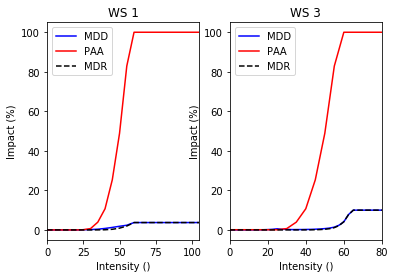

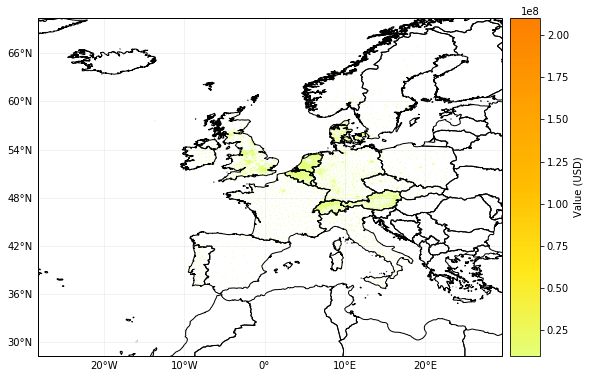

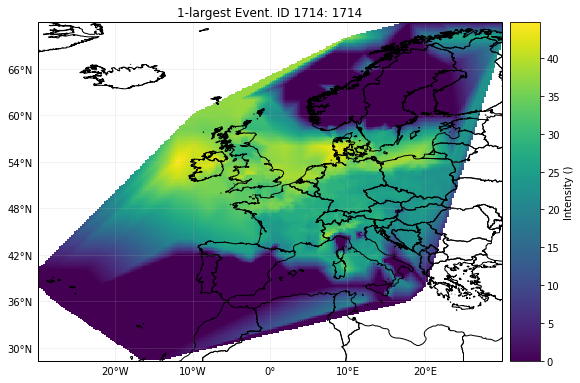

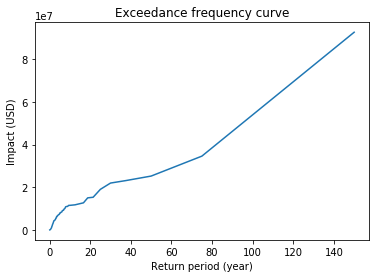

In [13]:
# SOLUTION: example: winter storms in europe
from climada.util import DATA_DIR
import pandas as pd
from climada.hazard import Hazard
from climada.entity import Exposures, ImpactFuncSet
from climada.engine import Impact

# Put any absoulte path for your files or set up the configuration variable "repository"
FILE_HAZARD = DATA_DIR + '/demo/WS_ERA40.mat' 
FILE_ENTITY = DATA_DIR + '/demo/WS_Europe.xls'

# Define hazard type
HAZ_TYPE = 'WS'

# 1. Entity: we only need impact functions and exposures to compute the impact
# Exposures
exp_ws_eu = pd.read_excel(FILE_ENTITY)
exp_ws_eu = Exposures(exp_ws_eu)
exp_ws_eu.check()

# Impact functions
impf_ws_eu = ImpactFuncSet()
impf_ws_eu.read_excel(FILE_ENTITY, 'Impact functions for winter storms in EU.')

# 2. Hazard
haz_ws_eu = Hazard(HAZ_TYPE)
haz_ws_eu.read_mat(FILE_HAZARD, 'WS EU ERA 40')

# 3. Impact
imp_ws_eu = Impact()
imp_ws_eu.calc(exp_ws_eu, impf_ws_eu, haz_ws_eu)

# 4.
# the damage functions for the hazard
impf_ws_eu.plot()

# the exposures values map
exp_ws_eu.plot_hexbin(pop_name=False)

# the strongest event
haz_ws_eu.plot_intensity(-1) # might be better to use an other earth projection?

# the impact exceedence frequency curve
imp_exc_curve = imp_ws_eu.calc_freq_curve()
imp_exc_curve.plot()